In [1]:
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import dqn_agent

In [ ]:
# Re-import if you did changes
reload(dqn_agent)

In [2]:
# Choose your environment
env = gym.make('MinAtar/Breakout-v1', render_mode="rgb_array")

# Print observation and action space infos
print(f"Training on {env.spec.id}")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}\n")

Training on MinAtar/Breakout-v1
Observation space: Box(False, True, (10, 10, 4), bool)
Action space: Discrete(3)



In [3]:

# Hyperparameters, Hint: Change as you see fit
LR = 0.001
BATCH_SIZE = 8
REPLAY_BUFFER_SIZE = 100_000
UPDATE_FREQ = 100
EPS_START = 0.5
EPS_END = 0.05
SCHEDULE_DURATION = 15_000
NUM_EPISODES = 1_000
DISCOUNT_FACTOR = 0.99

Episode 100 of 1000  Time Step: 990  Epsilon: 0.470
Episode 200 of 1000  Time Step: 2726  Epsilon: 0.418
Episode 300 of 1000  Time Step: 5304  Epsilon: 0.341
Episode 400 of 1000  Time Step: 7742  Epsilon: 0.268
Episode 500 of 1000  Time Step: 11306  Epsilon: 0.161
Episode 600 of 1000  Time Step: 16480  Epsilon: 0.050
Episode 700 of 1000  Time Step: 22522  Epsilon: 0.050
Episode 800 of 1000  Time Step: 29374  Epsilon: 0.050
Episode 900 of 1000  Time Step: 36196  Epsilon: 0.050
Episode 1000 of 1000  Time Step: 42494  Epsilon: 0.050


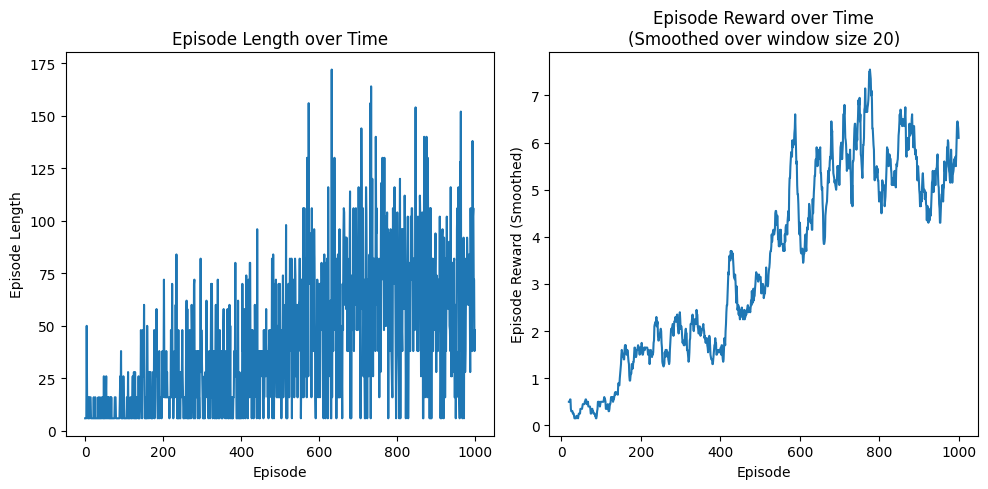

In [4]:

# Train DQN
agent = dqn_agent.DQNAgent(
    env, 
    gamma=DISCOUNT_FACTOR,
    lr=LR,
    batch_size=BATCH_SIZE,
    eps_start=EPS_START,
    eps_end=EPS_END,
    schedule_duration=SCHEDULE_DURATION,
    update_freq=UPDATE_FREQ,
    maxlen=REPLAY_BUFFER_SIZE,
)
stats = agent.train(NUM_EPISODES)


smoothing_window=20
fig, axes = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

# Plot the episode length over time
ax = axes[0]
ax.plot(stats.episode_lengths)
ax.set_xlabel("Episode")
ax.set_ylabel("Episode Length")
ax.set_title("Episode Length over Time") 

# Plot the episode reward over time
ax = axes[1]
rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
ax.plot(rewards_smoothed)
ax.set_xlabel("Episode")
ax.set_ylabel("Episode Reward (Smoothed)")
ax.set_title(f"Episode Reward over Time\n(Smoothed over window size {smoothing_window})")
plt.show()